In [1]:
import sqlite3
import pandas as pd

sql1 = '''
SELECT d.doc_label as year,
       word_id,
       word_str,
       sum(word_count) as word_count
  FROM docword w
       JOIN
       doc d USING (
           doc_id
       )
 GROUP BY doc_label,word_id'''

sql2 = '''
SELECT d.doc_label as year,
       sum(word_count) as word_count
  FROM docword w
       JOIN
       doc d USING (
           doc_id
       )
 GROUP BY doc_label'''

db = sqlite3.connect('../battelle.db')
DW = pd.read_sql_query(sql1,db)
WCY = pd.read_sql_query(sql2,db) # Word counts per year

In [2]:
DW['word_count_adj'] = 0

In [3]:
for i, year in enumerate(WCY['year']):
    wc = WCY[WCY['year'] == year]['word_count'][i]
    DW.loc[DW['year'] == year,'word_count_adj'] = DW.loc[DW['year'] == year,'word_count'] / wc

In [13]:
TW = pd.read_sql_query("SELECT DISTINCT word_str FROM topicword_long ORDER BY word_count DESC limit 20",db)
words = [word for word in TW['word_str']]

mirnas not foud
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
mir not foud
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
mirna not foud
Axes(0.125,0.125;0.775x0.775)
hcc not foud
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
dna not foud
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


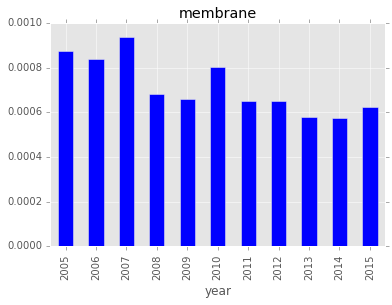

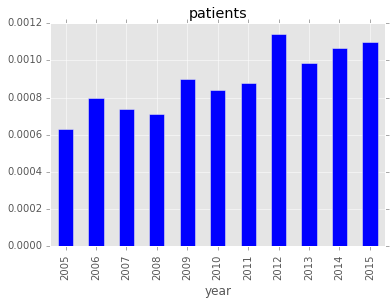

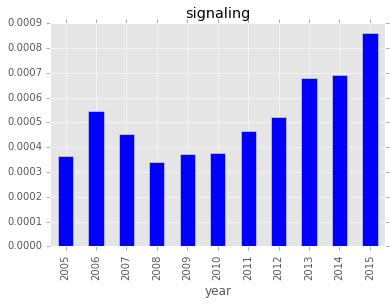

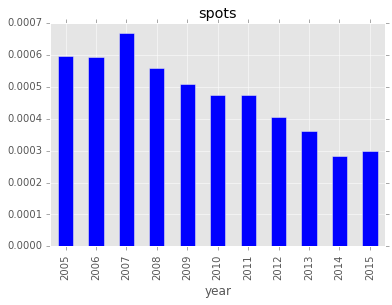

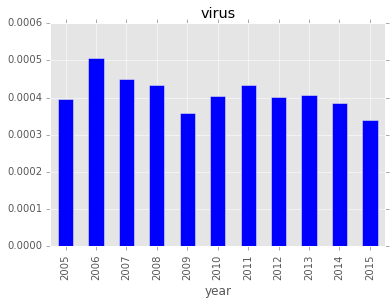

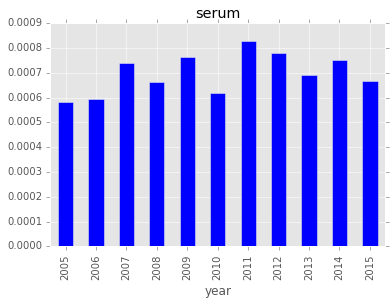

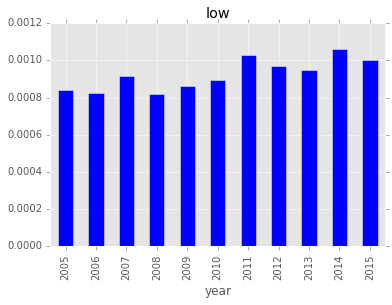

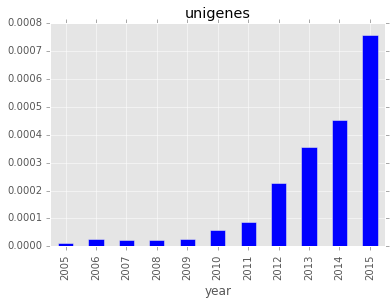

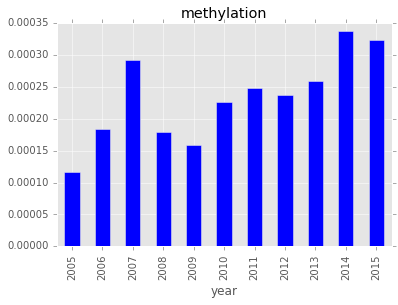

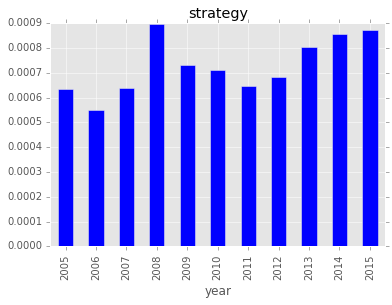

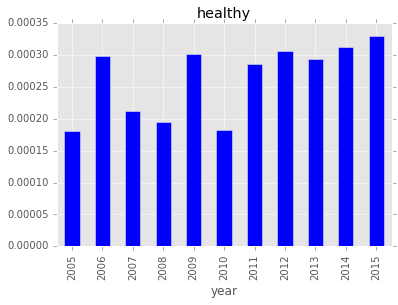

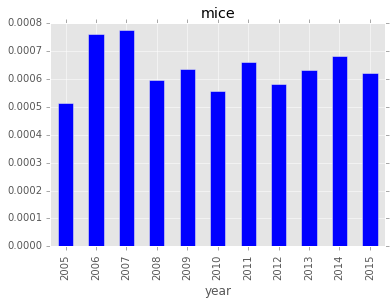

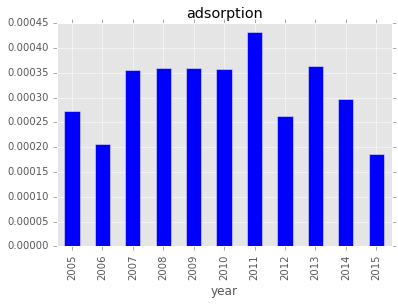

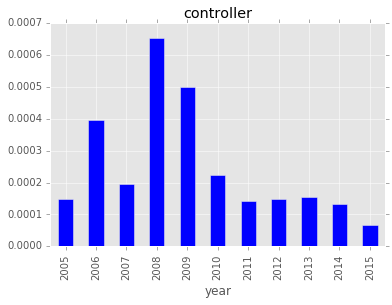

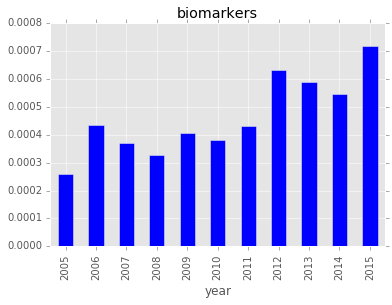

In [15]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

for word in words:
    try:
        x = DW[['year','word_count_adj']][DW['word_str']==word].plot(x='year',kind='bar',legend=False,title=word)
        print(x)
    except:
        print(word,"not foud")
        